<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/DR_databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import numpy as np
import umap.plot




In [4]:
pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.7 MB/s eta 0:00:00


In [2]:
!pip install seaborn
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=97db84bc99e8c132e538292ed960c2fe869641f3698689be0bfce71b5962b4eb
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [8]:

# Generating a synthetic medical dataset on pregnancies
# Features: Age, Number of Pregnancies, Blood Pressure, Blood Glucose Level, Weight, Height
# Generating a synthetic medical dataset on pregnancies
# Features: Age, Number of Pregnancies, Blood Pressure, Blood Glucose Level, Weight, Height

np.random.seed(1)  # Change the seed for different random values
data = {
    'Age': np.random.randint(20, 50, size=data_size),
    'Number_of_Pregnancies': np.random.randint(1, 12, size=data_size),
    'Blood_Pressure': np.random.randint(80, 150, size=data_size),
    'Blood_Glucose_Level': np.random.randint(70, 250, size=data_size),
    'Weight': np.random.randint(45, 110, size=data_size),
    'Height': np.random.randint(140, 190, size=data_size)
}
df = pd.DataFrame(data)


# Normalizing Dataset
df_normalized = (df - df.mean()) / df.std()
df_normalized.fillna(df_normalized.mean(), inplace=True)



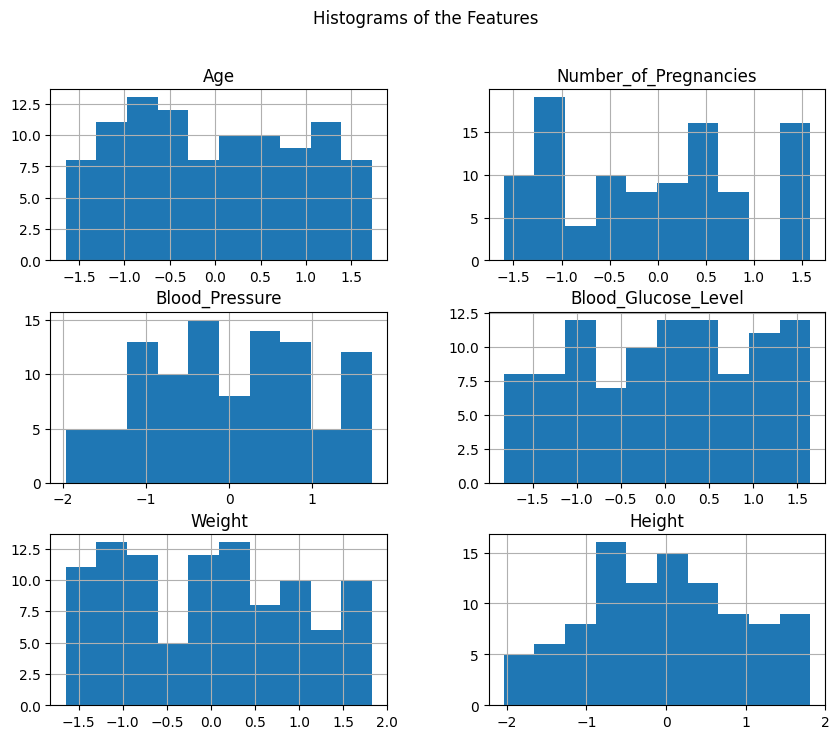

In [9]:

# Histograms
df_normalized.hist(figsize=(10, 8))
plt.suptitle("Histograms of the Features")
plt.show()


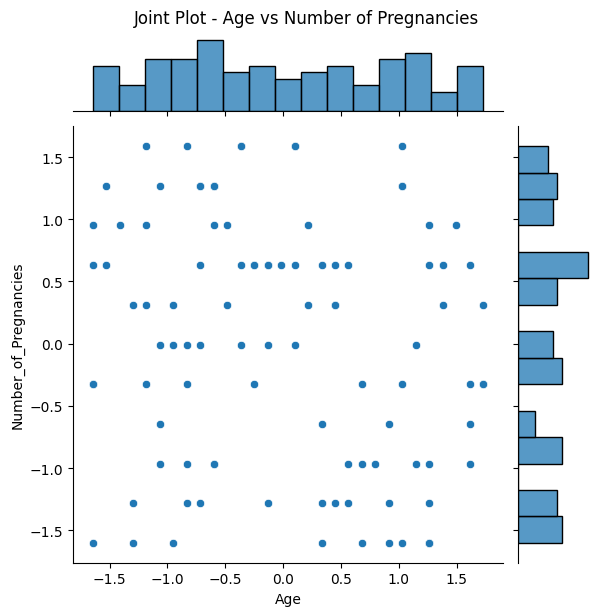

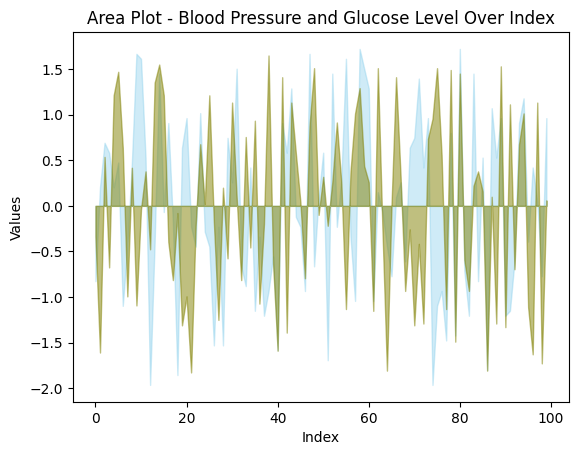

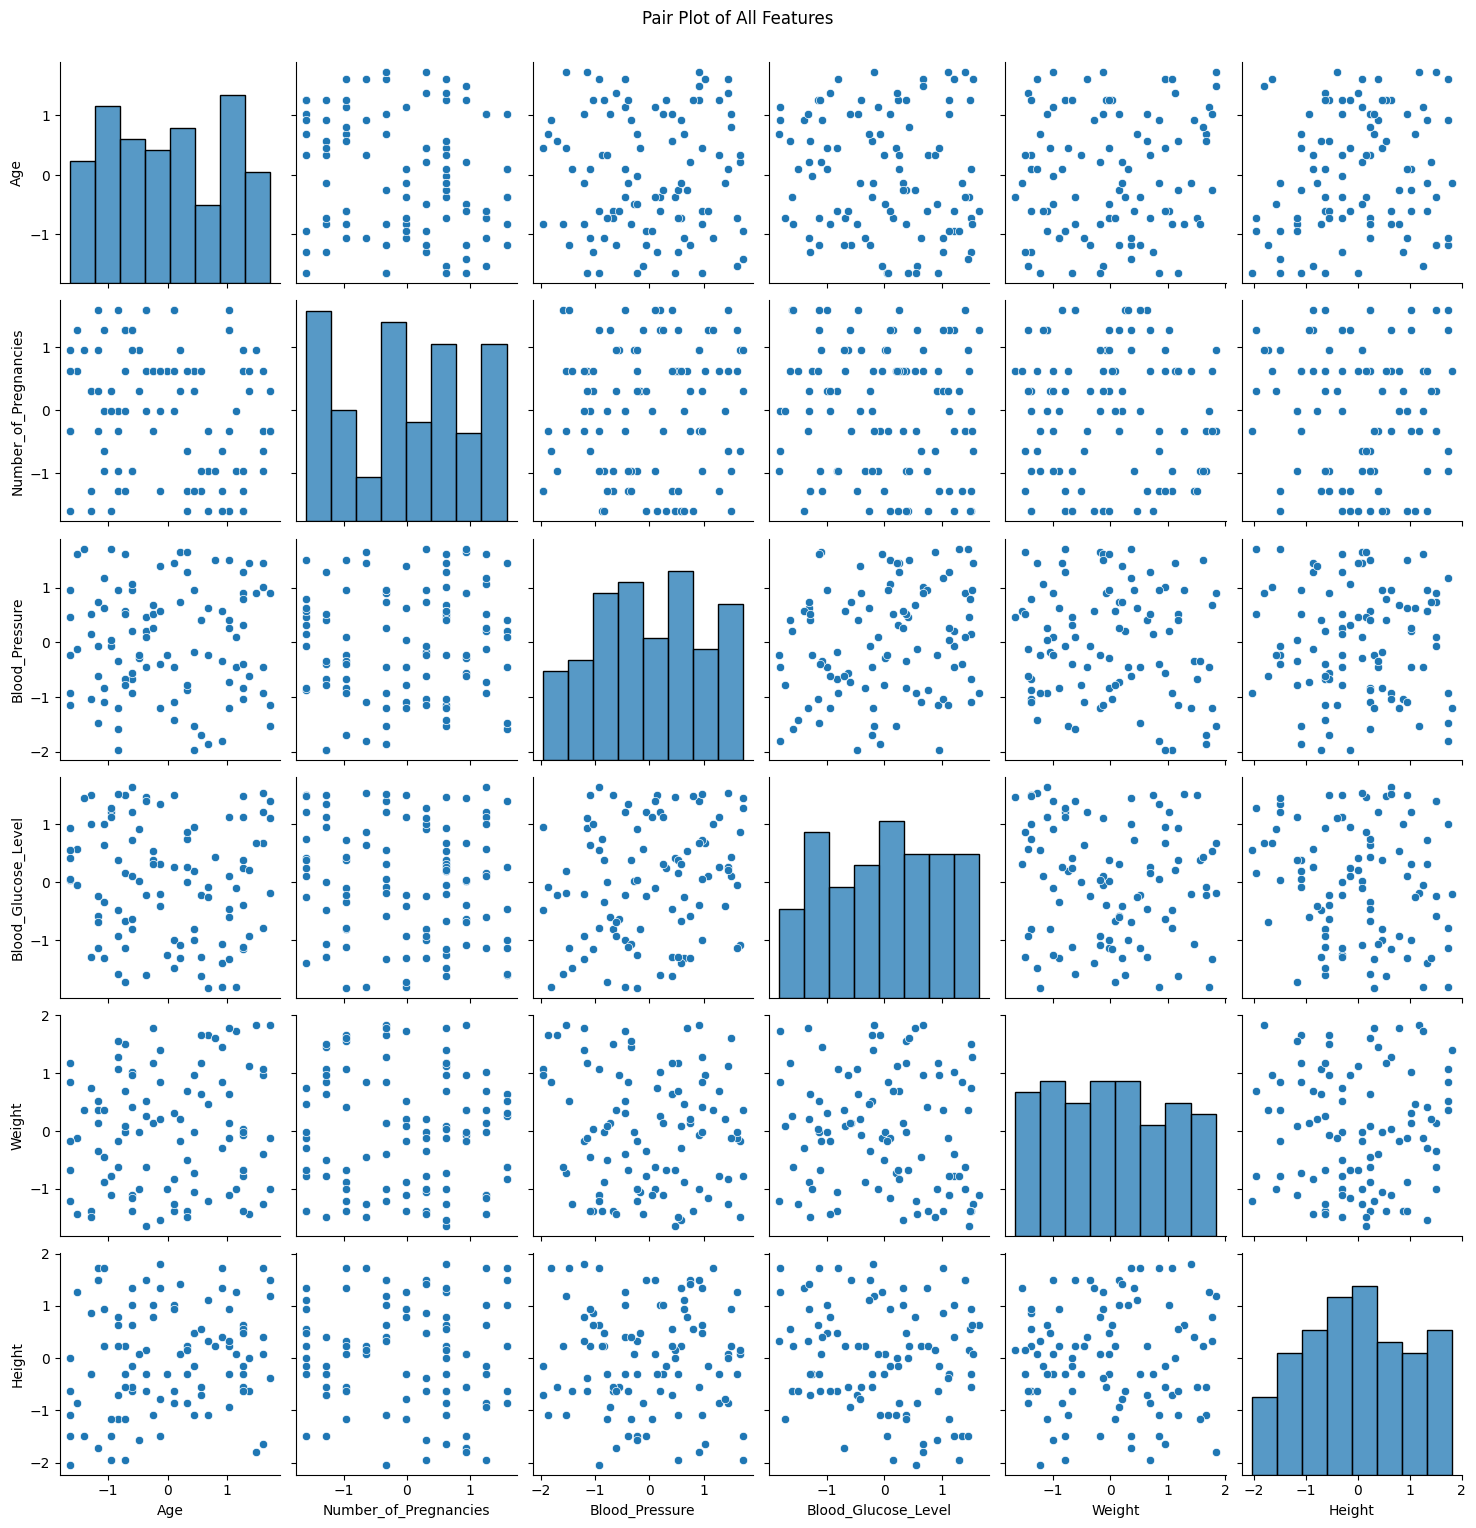

In [10]:
# Creating a joint plot for 'Age' and 'Number_of_Pregnancies'
sns.jointplot(x='Age', y='Number_of_Pregnancies', data=df_normalized, kind="scatter", marginal_kws=dict(bins=15, fill=True))
plt.suptitle("Joint Plot - Age vs Number of Pregnancies", y=1.02)
plt.show()

# Creating an area plot for 'Blood_Pressure' and 'Blood_Glucose_Level'
plt.fill_between(df_normalized.index, df_normalized['Blood_Pressure'], color="skyblue", alpha=0.4, label='Blood Pressure')
plt.fill_between(df_normalized.index, df_normalized['Blood_Glucose_Level'], color="olive", alpha=0.5, label='Blood Glucose Level')
plt.title("Area Plot - Blood Pressure and Glucose Level Over Index")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

# Creating a pair plot to visualize relationships between all pairs of features
sns.pairplot(df_normalized)
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()



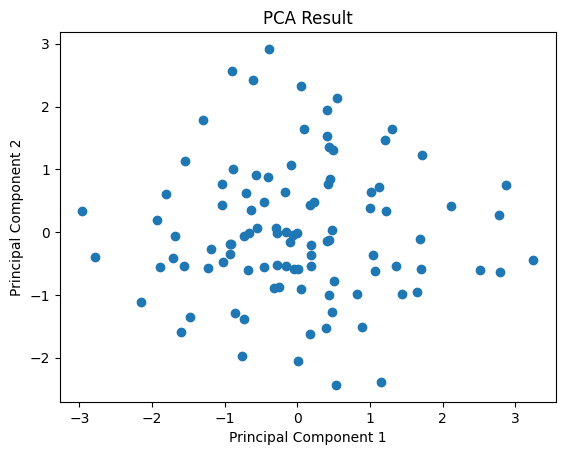

In [13]:
# Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


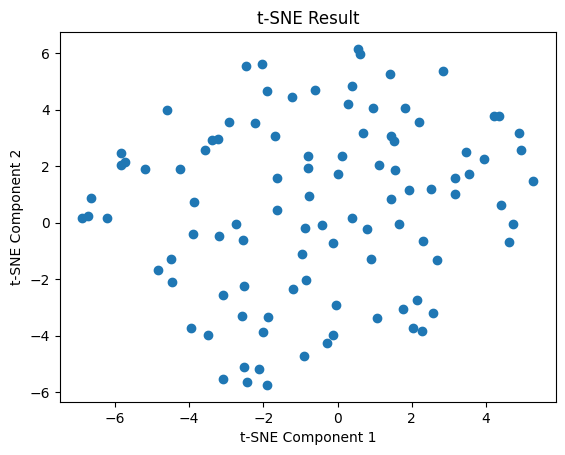

In [16]:

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_normalized)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
plt.title("t-SNE Result")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()




/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


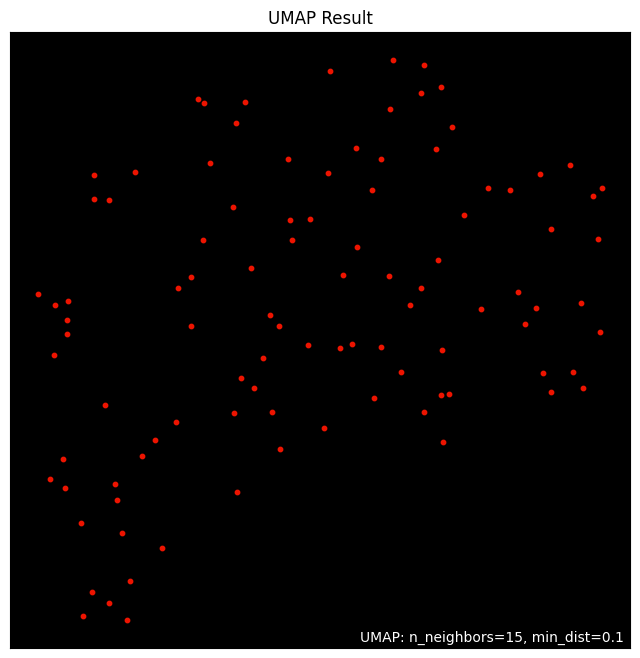

In [17]:
# UMAP
reducer = UMAP()
df_umap = reducer.fit_transform(df_normalized)
umap.plot.points(reducer, labels=None, theme='fire')
plt.title("UMAP Result")
plt.show()